# **Gantt chart**

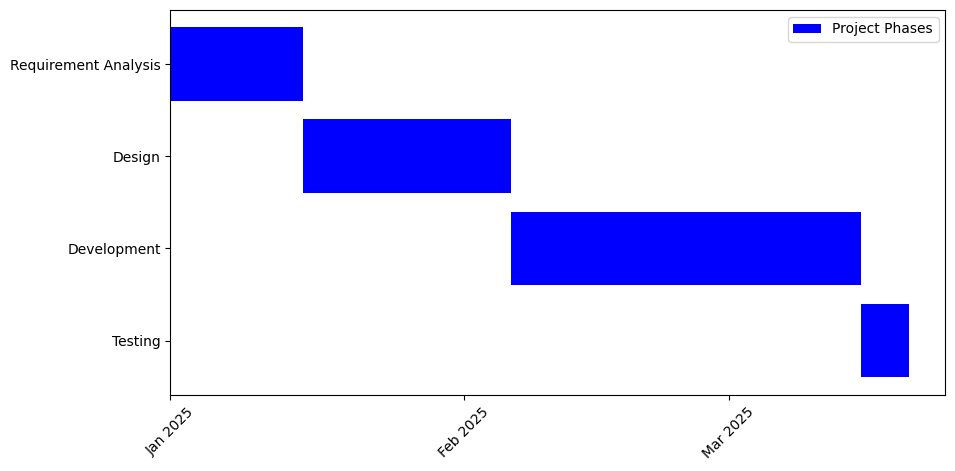

'/mnt/data/gantt_chart_reversed.png'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Define project phases and their timelines
phases = ["Requirement Analysis", "Design", "Development", "Testing"]
start_dates = ["2025-01-01", "2025-01-15", "2025-02-06", "2025-03-15"]
end_dates = ["2025-01-15", "2025-02-06", "2025-03-15", "2025-03-20"]

# Convert dates to pandas datetime format
start_dates = pd.to_datetime(start_dates)
end_dates = pd.to_datetime(end_dates)
durations = end_dates - start_dates

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars for each phase (reversed order of y-axis)
for i, (phase, start, duration) in enumerate(zip(reversed(phases), reversed(start_dates), reversed(durations))) :
    ax.barh(phase, duration.days, left=start, color='blue', label="Project Phases" if i == 0 else "")

# Formatting x-axis labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Labels and title

# Legend
ax.legend()

# Save the chart
gantt_chart_reversed_path = "/mnt/data/gantt_chart_reversed.png"
#plt.savefig(gantt_chart_reversed_path)
plt.show()

# Provide download link
gantt_chart_reversed_path

# **Installing and importing libraries**

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install opencv-python
!pip install os
!pip install tensorflow
!pip install tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.6 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 118.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, TimeDistributed, Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tqdm import tqdm

# **Loading prepared video dataset (396 fake and 44 real videos)**

In [ ]:
!pip install google.colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
base_path = "/content/drive/MyDrive/prepared_video_dataset"

Mounted at /content/drive


In [ ]:
categories = ["Real", "Fake"]          # folders


# Video & image settings
num_frames = 10
height, width, channels = 224, 224, 3


# Containers
X = []
y = []



def extract_frames(video_path, num_frames, target_size) :
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    frame_idxs = np.linspace(0, total_frames - 1, num_frames).astype(int)
    frames = []

    for i in range(total_frames) :
        ret, frame = cap.read()
        if not ret :
            break
        if i in frame_idxs :
            frame = cv2.resize(frame, target_size)
            frame = frame.astype("float32") / 255.0
            frames.append(frame)

    cap.release()

    if len(frames) == num_frames :
        return np.array(frames)
    else:
        return None

In [ ]:
for label, category in enumerate(categories) :  # Real = 0, Fake = 1
    folder_path = os.path.join(base_path, category)
    video_files = os.listdir(folder_path)

    for video_name in tqdm(video_files, desc=f"Processing {category}") :
        video_path = os.path.join(folder_path, video_name)
        frames = extract_frames(video_path, num_frames, (height, width))
        if frames is not None :
            X.append(frames)
            y.append(label)

Processing Fake: 100%|██████████| 396/396 [00:19<00:00, 20.58it/s]


# **After dataset has been loaded**

In [ ]:
X = np.array(X)
y = np.array(y)
print(X)
print(y)

[[[[[-0.9974164  -0.99723184 -0.99695504]
    [-0.9974164  -0.99723184 -0.99695504]
    [-0.9974164  -0.99723184 -0.99695504]
    ...
    [-0.9977547  -0.9976009  -0.9972626 ]
    [-0.9977547  -0.9976009  -0.9972626 ]
    [-0.9977547  -0.9976009  -0.9972626 ]]

   [[-0.9974164  -0.99723184 -0.99695504]
    [-0.9974164  -0.99723184 -0.99695504]
    [-0.9974164  -0.99723184 -0.99695504]
    ...
    [-0.9977547  -0.9976009  -0.9972626 ]
    [-0.9977547  -0.9976009  -0.9972626 ]
    [-0.9977547  -0.9976009  -0.9972626 ]]

   [[-0.9974164  -0.99723184 -0.99695504]
    [-0.9974164  -0.99723184 -0.99695504]
    [-0.9974164  -0.99723184 -0.99695504]
    ...
    [-0.9977547  -0.9976009  -0.9972626 ]
    [-0.9977547  -0.9976009  -0.9972626 ]
    [-0.9977547  -0.9976009  -0.9972626 ]]

   ...

   [[-0.9984929  -0.99858516 -0.9984006 ]
    [-0.9985544  -0.9986159  -0.9984314 ]
    [-0.99858516 -0.9986159  -0.9984929 ]
    ...
    [-0.99434066 -0.9945867  -0.9938485 ]
    [-0.9945867  -0.9948635  -

In [ ]:
# Preprocess the data (you would replace this with your actual dataset and pipeline)
X = preprocess_input(X)

In [ ]:
# Build the model
input_layer = Input(shape = (num_frames, height, width, channels))

In [ ]:
# Base CNN model (MobileNetV2 without top)
base_input = Input(shape = (height, width, channels))
base_output = MobileNetV2(weights = "imagenet", include_top = False)(base_input)
base_model = Model(inputs = base_input, outputs = base_output)
base_model.trainable = False

<ipython-input-12-ea44f823bce8>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_output = MobileNetV2(weights = "imagenet", include_top = False)(base_input)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Wrap CNN in TimeDistributed
cnn = TimeDistributed(base_model)(input_layer)
cnn = TimeDistributed(MaxPooling2D(pool_size = (2, 2)))(cnn)
cnn = TimeDistributed(Flatten())(cnn)

In [ ]:
# Add LSTM layer
x = LSTM(64, implementation=1, unroll=True)(cnn)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
out = Dense(1, activation="sigmoid")(x)

model = Model(inputs=input_layer, outputs=out)

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10, 224, 224,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 7, 7, 1280) │     2,257,984 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 10, 3, 3, 1280) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 10, 11520)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │     2,965,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,227,969 (19.94 MB)

 Trainable params: 2,969,985 (11.33 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train the model (use a small number of epochs for testing)
model.fit(X, y, epochs = 5, batch_size = 4, validation_split = 0.2)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.8694 - loss: 0.3993 - val_accuracy: 1.0000 - val_loss: 0.1624
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 270s 3s/step - accuracy: 0.8811 - loss: 0.4039 - val_accuracy: 1.0000 - val_loss: 0.1446
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.8946 - loss: 0.3666 - val_accuracy: 1.0000 - val_loss: 0.1771
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.8813 - loss: 0.3539 - val_accuracy: 1.0000 - val_loss: 0.1514
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.8677 - loss: 0.4128 - val_accuracy: 1.0000 - val_loss: 0.1308


In [ ]:
# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("deepfake_detection_model.tflite", "wb") as f:
    f.write(tflite_model)
    print("TFLite model saved.")

Saved artifact at '/tmp/tmpdonvzrv8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132446169963344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132446169964112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132446169966800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132446169966416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132446169965264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132446169966992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132446169966032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132446169963536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132446169967184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132446169965072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1324461699

# **Evaluation metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred_probs = model.predict(X)
y_pred = (y_pred_probs > 0.5).astype(int)

14/14 ━━━━━━━━━━━━━━━━━━━━ 225s 16s/step


In [ ]:
# Print metrics
print("Accuracy :", accuracy_score(y, y_pred))
print("Precision :", precision_score(y, y_pred))
print("Recall :", recall_score(y, y_pred))
print("F1 Score :", f1_score(y, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y, y_pred))

Accuracy : 0.9
Precision : 0.9
Recall : 1.0
F1 Score : 0.9473684210526315
Confusion Matrix :
 [[  0  44]
 [  0 396]]


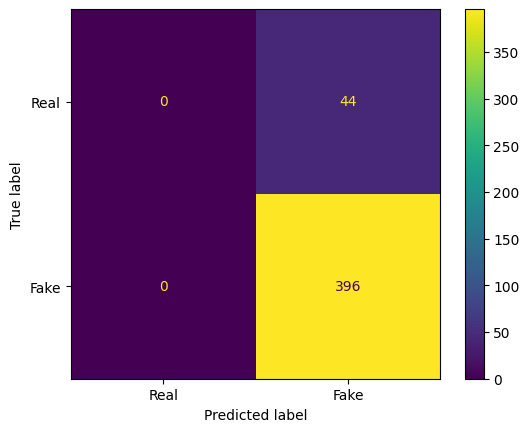

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y, y_pred), display_labels=["Real", "Fake"])
disp.plot()